In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [90]:
# Load the data
df = pd.read_csv(r"D:\VISHAL\INTERSHIP\NFLX.csv")


In [91]:
# Display the first few rows of the dataframe
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [92]:
# Select the 'Close' column for prediction
data = df.filter(['Close'])
print(data)


           Close
0     254.259995
1     265.720001
2     264.559998
3     250.100006
4     249.470001
...          ...
1004  427.140015
1005  457.130005
1006  429.480011
1007  405.600006
1008  410.170013

[1009 rows x 1 columns]


In [93]:
# Convert the dataframe to a numpy array
dataset = data.values
print(dataset)



[[254.259995]
 [265.720001]
 [264.559998]
 ...
 [429.480011]
 [405.600006]
 [410.170013]]


In [94]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .8))
print(training_data_len)

808


In [95]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.04451626]
 [0.06954849]
 [0.06701469]
 ...
 [0.4272515 ]
 [0.37509011]
 [0.38507243]]


In [96]:
# Create the training dataset
train_data = scaled_data[0:training_data_len, :]
print(train_data)

[[0.04451626]
 [0.06954849]
 [0.06701469]
 [0.03542955]
 [0.03405342]
 [0.05257641]
 [0.05327534]
 [0.0701601 ]
 [0.10133021]
 [0.09750767]
 [0.09757319]
 [0.10301218]
 [0.09667768]
 [0.11369343]
 [0.13167034]
 [0.12391599]
 [0.12559796]
 [0.12343551]
 [0.14672022]
 [0.1771914 ]
 [0.19951508]
 [0.19064677]
 [0.18156003]
 [0.2131015 ]
 [0.19095254]
 [0.17911361]
 [0.19149862]
 [0.19049385]
 [0.18472731]
 [0.17387127]
 [0.18265218]
 [0.18042421]
 [0.15906164]
 [0.14647998]
 [0.18887749]
 [0.1459339 ]
 [0.11334393]
 [0.13426968]
 [0.10137394]
 [0.10875693]
 [0.12026823]
 [0.13125532]
 [0.12007165]
 [0.12243068]
 [0.14021101]
 [0.15244317]
 [0.16463161]
 [0.16987394]
 [0.16142066]
 [0.22319301]
 [0.21982915]
 [0.21585376]
 [0.20508505]
 [0.18525152]
 [0.15976057]
 [0.15700838]
 [0.17496343]
 [0.17011425]
 [0.17164323]
 [0.17347804]
 [0.1736091 ]
 [0.16996133]
 [0.18830954]
 [0.20178678]
 [0.20316291]
 [0.21061135]
 [0.20908237]
 [0.2022236 ]
 [0.20674514]
 [0.20150281]
 [0.20600248]
 [0.19

In [97]:
# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    print(i)

60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319


In [98]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train, y_train)

[[0.04451626 0.06954849 0.06701469 ... 0.17011425 0.17164323 0.17347804]
 [0.06954849 0.06701469 0.03542955 ... 0.17164323 0.17347804 0.1736091 ]
 [0.06701469 0.03542955 0.03405342 ... 0.17347804 0.1736091  0.16996133]
 ...
 [0.75568473 0.72364077 0.70531449 ... 0.6687054  0.68880096 0.68294702]
 [0.72364077 0.70531449 0.71656362 ... 0.68880096 0.68294702 0.70020314]
 [0.70531449 0.71656362 0.63214003 ... 0.68294702 0.70020314 0.68956555]] [0.1736091  0.16996133 0.18830954 0.20178678 0.20316291 0.21061135
 0.20908237 0.2022236  0.20674514 0.20150281 0.20600248 0.19951508
 0.19724337 0.21393155 0.21349466 0.24210916 0.25209149 0.25646011
 0.25305259 0.26137482 0.25713724 0.27533254 0.27943906 0.28815444
 0.29175861 0.27854348 0.27673053 0.27865273 0.28385134 0.31901878
 0.34728379 0.34533979 0.34188853 0.37373584 0.39946704 0.39658373
 0.38708196 0.32895744 0.36152555 0.34186674 0.35285382 0.34413837
 0.35888248 0.34215064 0.35934124 0.38087852 0.40429435 0.39699876
 0.40359536 0.392346

In [99]:
from keras.models import Model
from keras.layers import LSTM, Dense, Input

# Define the input layer
inputs = Input(shape=(x_train.shape[1], 1))
print(inputs)


<KerasTensor shape=(None, 60, 1), dtype=float32, sparse=False, name=keras_tensor_109>


In [108]:
# Add LSTM layers
x = LSTM(50, return_sequences=True)(inputs)
print(x)
x = LSTM(50, return_sequences=False)(x)
print(x)

<KerasTensor shape=(None, 60, 50), dtype=float32, sparse=False, name=keras_tensor_114>
<KerasTensor shape=(None, 50), dtype=float32, sparse=False, name=keras_tensor_115>


In [109]:
# Add Dense layers
x = Dense(25)(x)
outputs = Dense(1)(x)
print(outputs)

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_117>


In [102]:
# Create the model
model = Model(inputs=inputs, outputs=outputs)
print(model)

<Functional name=functional_11, built=True>


In [104]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]

# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    print(i)

# Convert the data to a numpy array
x_test = np.array(x_test)
print(x_test)

748/748 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - loss: 0.0062
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
[[0.71656362 0.63214003 0.66560358 ... 0.70020314 0.68956555 0.60072954]
 [0.63214003 0.66560358 0.65203908 ... 0.68956555 0.60072954 0.60046743]
 [0.66560358 0.65203908 0.666564

In [105]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test )



[[[0.71656362]
  [0.63214003]
  [0.66560358]
  ...
  [0.70020314]
  [0.68956555]
  [0.60072954]]

 [[0.63214003]
  [0.66560358]
  [0.65203908]
  ...
  [0.68956555]
  [0.60072954]
  [0.60046743]]

 [[0.66560358]
  [0.65203908]
  [0.66656468]
  ...
  [0.60072954]
  [0.60046743]
  [0.59341208]]

 ...

 [[0.8995871 ]
  [0.9121033 ]
  [0.92202003]
  ...
  [0.32869527]
  [0.42214021]
  [0.48764772]]

 [[0.9121033 ]
  [0.92202003]
  [0.90218643]
  ...
  [0.42214021]
  [0.48764772]
  [0.4272515 ]]

 [[0.92202003]
  [0.90218643]
  [0.92549314]
  ...
  [0.48764772]
  [0.4272515 ]
  [0.37509011]]]


In [106]:
# Get the model's predicted price values
predictions = model.predict(x_test)

print(predictions)

predictions = scaler.inverse_transform(predictions)




7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step
[[0.6469043 ]
 [0.6326144 ]
 [0.61741227]
 [0.60487807]
 [0.59373116]
 [0.5849146 ]
 [0.5789359 ]
 [0.5762295 ]
 [0.5742108 ]
 [0.57126707]
 [0.56643325]
 [0.56232977]
 [0.5601905 ]
 [0.5545821 ]
 [0.55049545]
 [0.5447935 ]
 [0.5395964 ]
 [0.5370538 ]
 [0.5348213 ]
 [0.5323652 ]
 [0.53052753]
 [0.5329655 ]
 [0.53598875]
 [0.5403557 ]
 [0.54438   ]
 [0.5480688 ]
 [0.55155313]
 [0.55422133]
 [0.55518436]
 [0.5552987 ]
 [0.55233085]
 [0.54978555]
 [0.5476332 ]
 [0.5453041 ]
 [0.5414174 ]
 [0.53772014]
 [0.5349323 ]
 [0.5358906 ]
 [0.5362465 ]
 [0.536528  ]
 [0.5383407 ]
 [0.5412598 ]
 [0.54332626]
 [0.54797935]
 [0.55422425]
 [0.5618769 ]
 [0.571652  ]
 [0.58276033]
 [0.59321976]
 [0.6006769 ]
 [0.60730493]
 [0.61275667]
 [0.6190262 ]
 [0.62325644]
 [0.6246652 ]
 [0.6260191 ]
 [0.6274298 ]
 [0.62956315]
 [0.6336761 ]
 [0.6367619 ]
 [0.63564646]
 [0.6333835 ]
 [0.6304569 ]
 [0.6228565 ]
 [0.6136889 ]
 [0.6058516 ]
 [0.59980476]
 [0.5959739 ]
 [0.59374

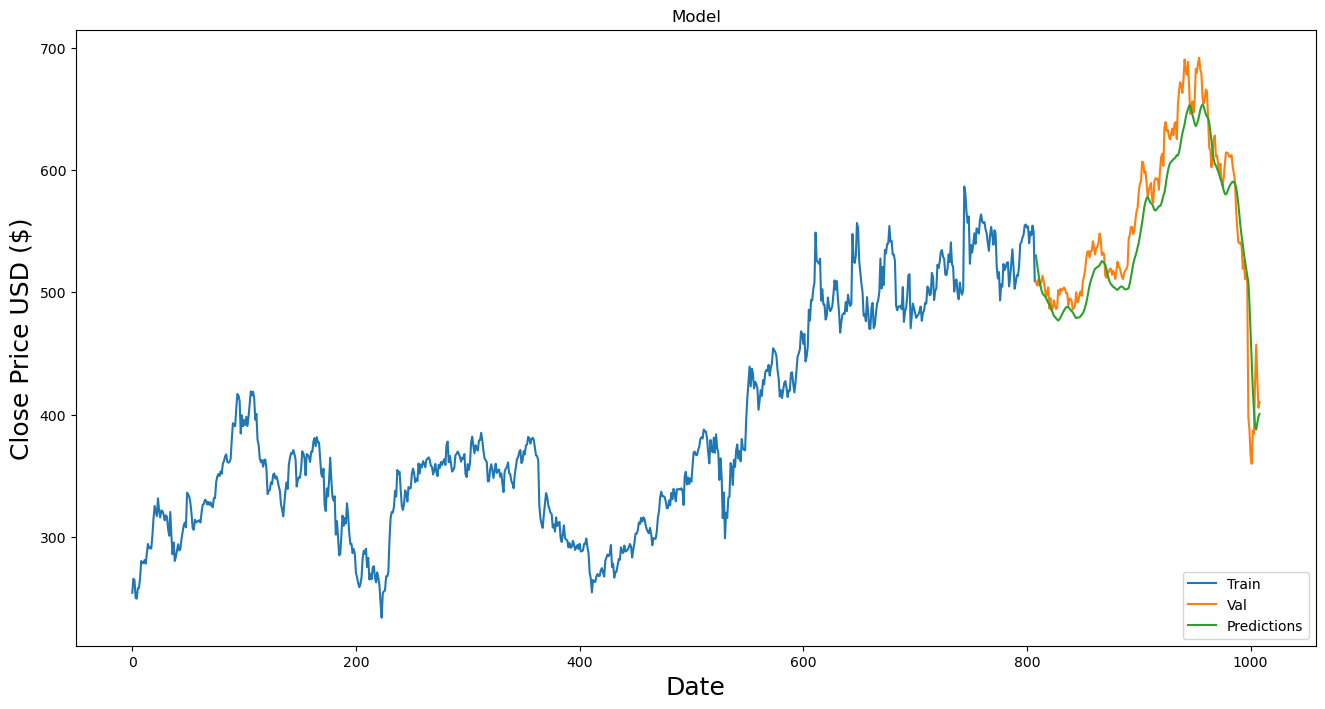

In [112]:
 pd.options.mode.copy_on_write = True 

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:


# Display the valid and predicted prices
valid.tail()






In [113]:
# There will be no visible output from this command unless there’s an error.


model.save("lstm_stock_prediction_model.keras")

from keras.models import load_model

model = load_model("lstm_stock_prediction_model.keras", compile=False)

In [114]:
# Check the model summary
model.summary()

# Optionally, check the loaded model with some test data
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Loss: {loss}, Accuracy: {accuracy}")

#If there are any issues (like the file not being found or a problem with loading), you’ll see an error message indicating what went wrong.


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)